In [1]:
import torch
import numpy as np 


In [8]:
data = (torch.randn((5, 5)), torch.randn((5, 5)))



data = torch.stack(data, dim=0).unsqueeze(0).detach().cpu().numpy()

In [9]:
data.shape

(1, 2, 5, 5)

In [8]:
import numpy as np
import torch 
from einops import rearrange


gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/time_tokens.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')


/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
gpt_data.shape

torch.Size([938, 7, 768])

In [3]:
gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/time_tokens.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')



txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_last.npy')
# gpt_first = np.reshape(gpt_data[:, 0, :, :], (-1, 768))
# gpt_last = np.reshape(gpt_data[:, -1, :, :], (-1, 768))
gpt_last = gpt_data.detach().cpu().numpy()[:, -1, :]

In [4]:
gpt_last.shape

(938, 768)

/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


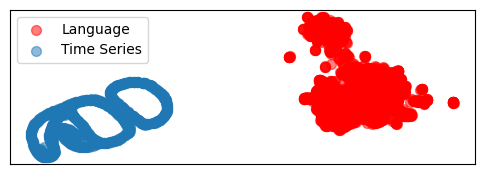

In [18]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import torch 
from einops import rearrange


#####################     GPT2 First Layer with      #####################



gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/time_tokens.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')



txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_first.npy')
# gpt_first = np.reshape(gpt_data[:, 0, :, :], (-1, 768))
# gpt_last = np.reshape(gpt_data[:, -1, :, :], (-1, 768))
gpt_last = gpt_data.detach().cpu().numpy()[:, 0, :]
n_samples = 5000
n_sample_gpt = gpt_last.shape[0]
combined_data = np.vstack((txt_token_last[:n_samples, :], gpt_last[:, :]))



labels = np.array([0] * n_samples + [1] * n_sample_gpt)
reducer = umap.UMAP(n_components=2, random_state=10, n_neighbors=10)
reduced_data = reducer.fit_transform(combined_data)



plt.figure(figsize=(6, 2))
plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], s=50, label='Language', alpha=0.5)
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], s=50, label='Time Series', alpha=0.5)
# plt.title("UMAP Visualization of Two Batches of High-Dimensional Data")
# plt.xlabel("UMAP Feature 1")
# plt.ylabel("UMAP Feature 2")
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.xticks([])
plt.yticks([])
plt.show()

/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


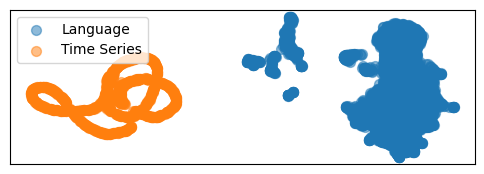

In [21]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import torch 
from einops import rearrange


#####################     GPT2 Last Layer with      #####################



gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/time_tokens.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')



txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_last.npy')
# gpt_first = np.reshape(gpt_data[:, 0, :, :], (-1, 768))
# gpt_last = np.reshape(gpt_data[:, -1, :, :], (-1, 768))
gpt_last = gpt_data.detach().cpu().numpy()[:, -1, :]
n_samples = 5000
n_sample_gpt = gpt_last.shape[0]
combined_data = np.vstack((txt_token_last[:n_samples, :], gpt_last[:, :]))

labels = np.array([0] * n_samples + [1] * n_sample_gpt)
reducer = umap.UMAP(n_components=2, random_state=10, n_neighbors=10)
reduced_data = reducer.fit_transform(combined_data)



plt.figure(figsize=(6, 2))
plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], s=50, label='Language', alpha=0.5)
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], s=50, label='Time Series', alpha=0.5)
# plt.title("UMAP Visualization of Two Batches of High-Dimensional Data")
# plt.xlabel("UMAP Feature 1")
# plt.ylabel("UMAP Feature 2")
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.xticks([])
plt.yticks([])
plt.show()

/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


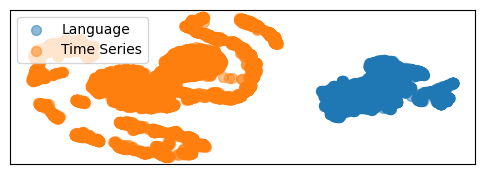

In [5]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import torch 
from einops import rearrange


#####################     GPT2 Last Layer with      #####################



gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Random_0/time_tokens.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')


txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_last.npy')
# gpt_first = np.reshape(gpt_data[:, 0, :, :], (-1, 768))
# gpt_last = np.reshape(gpt_data[:, -1, :, :], (-1, 768))
gpt_last = gpt_data.detach().cpu().numpy()[:, -1, :]
n_samples = 30000
n_sample_gpt = gpt_last.shape[0]
combined_data = np.vstack((txt_token_last[:n_samples, :], gpt_last[:, :]))

labels = np.array([0] * n_samples + [1] * n_sample_gpt)
reducer = umap.UMAP(n_components=2, random_state=10, n_neighbors=10)
reduced_data = reducer.fit_transform(combined_data)



plt.figure(figsize=(6, 2))
plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], s=50, label='Language', alpha=0.5)
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], s=50, label='Time Series', alpha=0.5)
# plt.title("UMAP Visualization of Two Batches of High-Dimensional Data")
# plt.xlabel("UMAP Feature 1")
# plt.ylabel("UMAP Feature 2")
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.xticks([])
plt.yticks([])
plt.show()

/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


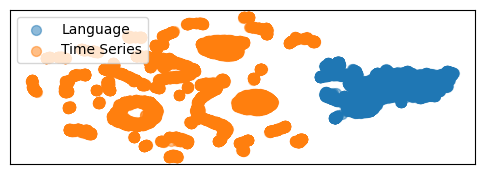

In [9]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import torch 
from einops import rearrange


#####################    Random CALF ETTh1 Last Layer    #####################



gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/time_tokens.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')


txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_last.npy')
# gpt_first = np.reshape(gpt_data[:, 0, :, :], (-1, 768))
# gpt_last = np.reshape(gpt_data[:, -1, :, :], (-1, 768))
gpt_last = gpt_data.detach().cpu().numpy()[:, -1, :]
n_ts = 10000
n_txt = 10000
n_sample_gpt = gpt_last.shape[0]
combined_data = np.vstack((txt_token_last[:n_txt, :], gpt_last[:n_ts, :]))

labels = np.array([0] * n_txt + [1] * n_ts)
reducer = umap.UMAP(n_components=2, random_state=10, n_neighbors=10)
reduced_data = reducer.fit_transform(combined_data)



plt.figure(figsize=(6, 2))
plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], s=50, label='Language', alpha=0.5)
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], s=50, label='Time Series', alpha=0.5)
# plt.title("UMAP Visualization of Two Batches of High-Dimensional Data")
# plt.xlabel("UMAP Feature 1")
# plt.ylabel("UMAP Feature 2")
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.xticks([])
plt.yticks([])
plt.show()

In [20]:

gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_48_100_CALF_custom_ftM_sl104_ll0_pl48_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Random_0/time_tokens.npy')
gpt_data = torch.tensor(gpt_data)
# gpt_data = gpt_data.contiguous().permute(0,2,1,3)
# gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')


# txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_last.npy')
# gpt_last = gpt_data.detach().cpu().numpy()[:, -1, :]
gpt_data.shape

torch.Size([146, 7, 768])

/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


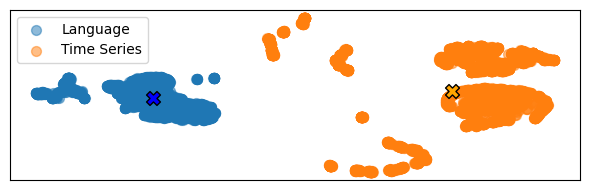

In [10]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import torch 
from einops import rearrange

gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Random_0/time_tokens.npy')


# print(gpt_data.shape)
# gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_48_100_CALF_custom_ftM_sl104_ll0_pl48_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/time_tokens.npy')
# gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_48_100_CALF_custom_ftM_sl104_ll0_pl48_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Random_0/time_tokens.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')


txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_last.npy')
gpt_last = gpt_data.detach().cpu().numpy()[:, -1, :]


n_samples = 5000
n_ts = 5000
# Example: Assuming txt_tokens and last_layer are of shape (batch_size, feature_size)
# Combine a batch of data (ensure both have the same number of samples)
combined_data = np.vstack((gpt_last[:n_samples, :], txt_token_last[:n_ts, :]))

# Create labels for each batch (0 for txt_tokens, 1 for last_layer)
labels = np.array([0] * n_samples + [1] * n_ts)  # Adjust based on the number of samples

# Initialize and apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=10)
reduced_data = reducer.fit_transform(combined_data)

# Calculate centroids for each cluster
centroid_language = reduced_data[labels == 1].mean(axis=0)
centroid_time_series = reduced_data[labels == 0].mean(axis=0)

# Visualize the reduced data and centroids
plt.figure(figsize=(6, 2))
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], s=50, label='Language', alpha=0.5)
plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], s=50, label='Time Series', alpha=0.5)

# Plot centroids
plt.scatter(centroid_language[0], centroid_language[1], s=100, c='blue', edgecolors='k', marker='X')
plt.scatter(centroid_time_series[0], centroid_time_series[1], s=100, c='orange', edgecolors='k', marker='X')

# Customize plot
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.show()


/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


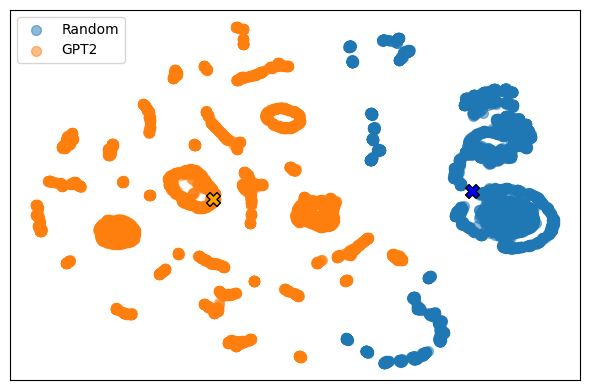

In [18]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import torch 
from einops import rearrange

gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/time_tokens.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')


random_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Random_0/time_tokens.npy')
random_data = torch.tensor(random_data)
random_data = random_data.contiguous().permute(0,2,1,3)
random_data = rearrange(random_data, 'b s i e -> (b s) i e')


gpt_last = gpt_data.detach().cpu().numpy()[:, -1, :]
random_last = random_data.detach().cpu().numpy()[:, -1, :]

n_samples = 5000
n_ts = 5000
# Example: Assuming txt_tokens and last_layer are of shape (batch_size, feature_size)
# Combine a batch of data (ensure both have the same number of samples)
combined_data = np.vstack((gpt_last[:n_samples, :], random_last[:n_ts, :]))

# Create labels for each batch (0 for txt_tokens, 1 for last_layer)
labels = np.array([0] * n_samples + [1] * n_ts)  # Adjust based on the number of samples

# Initialize and apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=10)
reduced_data = reducer.fit_transform(combined_data)

# Calculate centroids for each cluster
centroid_language = reduced_data[labels == 1].mean(axis=0)
centroid_time_series = reduced_data[labels == 0].mean(axis=0)

# Visualize the reduced data and centroids
plt.figure(figsize=(6, 4))
plt.scatter(reduced_data[labels == 1, 0], reduced_data[labels == 1, 1], s=50, label='Random', alpha=0.5)
plt.scatter(reduced_data[labels == 0, 0], reduced_data[labels == 0, 1], s=50, label='GPT2', alpha=0.5)

# Plot centroids
plt.scatter(centroid_language[0], centroid_language[1], s=100, c='blue', edgecolors='k', marker='X')
plt.scatter(centroid_time_series[0], centroid_time_series[1], s=100, c='orange', edgecolors='k', marker='X')

# Customize plot
plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=10)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.show()


In [2]:
import numpy as np 
import torch
from einops import rearrange

# gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/time_tokens.npy')
gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/time_tokens.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')
gpt_data = gpt_data.detach().cpu().numpy()


# Random_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Random_0/time_tokens.npy')
Random_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Random_0/time_tokens.npy')
Random_data = torch.tensor(Random_data)
Random_data = Random_data.contiguous().permute(0,2,1,3)
Random_data = rearrange(Random_data, 'b s i e -> (b s) i e')
Random_data = Random_data.detach().cpu().numpy()



txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_last.npy')
txt_token_first = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_first.npy')


In [3]:
gpt_last_mean = np.mean(gpt_data[:, -1, :], axis=0)
gpt_first_mean = np.mean(gpt_data[:, 0, :], axis=0)


Random_last_mean = np.mean(Random_data[:, -1, :], axis=0)
Random_first_mean = np.mean(Random_data[:, 0, :], axis=0)


txt_token_first_mean = np.mean(txt_token_first, axis=0)
txt_token_last_mean = np.mean(txt_token_last, axis=0)


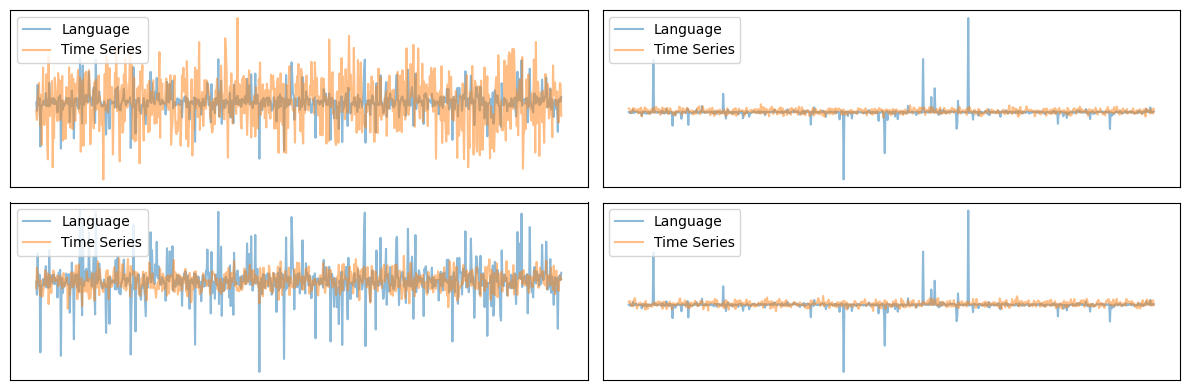

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(12, 4))

ax[0, 0].plot(txt_token_first_mean, label='Language', alpha=0.5)
ax[0, 0].plot(gpt_first_mean, label='Time Series', alpha=0.5)

ax[0, 0].legend()
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 0].legend(loc='upper left', bbox_to_anchor=(0, 1)) 
# ax[0, 0].set_title('Feature map before LLM')


ax[1, 0].plot(txt_token_first_mean, label='Language', alpha=0.5)
ax[1, 0].plot(Random_first_mean, label='Time Series', alpha=0.5)

ax[1, 0].legend()
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 0].legend(loc='upper left', bbox_to_anchor=(0, 1)) 
# ax[1, 0].set_title('Feature map after LLM')


ax[0, 1].plot(txt_token_last_mean, label='Language', alpha=0.5)
ax[0, 1].plot(gpt_last_mean, label='Time Series', alpha=0.5)

ax[0, 1].legend()
ax[0, 1].set_xticks([])
ax[0, 1].set_yticks([])
ax[0, 1].legend(loc='upper left', bbox_to_anchor=(0, 1))
# ax[0, 1].set_ylim(-1, 1)
# ax[0, 0].set_title('Feature map before LLM')


ax[1, 1].plot(txt_token_last_mean, label='Language', alpha=0.5)
ax[1, 1].plot(Random_last_mean, label='Time Series', alpha=0.5)

ax[1, 1].legend()
ax[1, 1].set_xticks([])
ax[1, 1].set_yticks([])
ax[1, 1].legend(loc='upper left', bbox_to_anchor=(0, 1)) 



plt.tight_layout()

In [10]:
import numpy as np 

data = [[1.6101 , 0.8057 , 1.6281 , 0.8159 , 1.7372 , 0.8422 , 1.7643 , 0.8718 , 1.8172 , 0.8917 , 1.8746 , 0.9671],
       [1.5147 , 0.7811 , 1.5388 , 0.7928 , 1.6892 , 0.7513 , 1.7311 , 0.8341 , 1.7793 , 0.8677 , 1.9124 , 0.9836],
       [2.0744 , 0.9871 , 2.0267 , 0.9863 , 1.8341 , 0.9412 , 1.7424 , 0.8447 , 1.8248 , 0.9298 , 1.8118 , 0.9375],
       [2.0312 , 0.9726 , 2.2248 , 1.0864 , 1.8921 , 0.9131 , 1.6387 , 0.7377 , 1.6816 , 0.7781 , 1.8817 , 0.9014]]
np.mean(data, axis=0)

array([1.8076  , 0.886625, 1.8546  , 0.92035 , 1.78815 , 0.86195 ,
       1.719125, 0.822075, 1.775725, 0.866825, 1.870125, 0.9474  ])

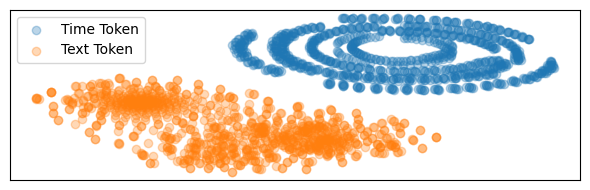

In [21]:
# Plot the Sample T-SNE

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


gpt_data = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/time_tokens.npy')
gpt_data = torch.tensor(gpt_data)
gpt_data = gpt_data.contiguous().permute(0,2,1,3)
gpt_data = rearrange(gpt_data, 'b s i e -> (b s) i e')



txt_token_last = np.load('/home/nathan/LLM4TS/Imputation_task/CALF/txt_tokens_first.npy')
# gpt_first = np.reshape(gpt_data[:, 0, :, :], (-1, 768))
# gpt_last = np.reshape(gpt_data[:, -1, :, :], (-1, 768))
gpt_last = gpt_data.detach().cpu().numpy()[:, 0, :]

n_samples = 1000
n_sample_gpt = gpt_last.shape[0]
combined_data = np.vstack((txt_token_last[:n_samples, :], gpt_last[:, :]))



labels = np.array([0] * n_samples + [1] * n_sample_gpt)
tsne = TSNE(n_components=2, random_state=42)
data_2d = tsne.fit_transform(combined_data)



plt.figure(figsize=(6, 2))
plt.scatter(data_2d[labels == 1, 0], data_2d[labels == 1, 1], label='Time Token', alpha=0.3)
plt.scatter(data_2d[labels == 0, 0], data_2d[labels == 0, 1], label='Text Token', alpha=0.3)


# Add labels and title
# plt.title('T-SNE Visualization of Two Normal Distributions', fontsize=16)
# plt.xlabel('T-SNE Component 1', fontsize=12)
# plt.ylabel('T-SNE Component 2', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(0, 1))
plt.yticks([])
plt.xticks([])

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
from transformers.models.gpt2.modeling_gpt2 import GPT2Model
from transformers.models.gpt2.configuration_gpt2 import GPT2Config
import torch



gpt2_config = GPT2Config.from_pretrained('gpt2')
gpt2_config.num_hidden_layers = 6
gpt2_config.output_attentions = True
gpt2_config.output_hidden_states = True

llm = GPT2Model.from_pretrained(
    'gpt2',
    trust_remote_code=True,
    local_files_only=True,
    config=gpt2_config,
)
llm = llm.cpu()


llm.eval()
with torch.no_grad():
    
    txt_tokens = llm.get_input_embeddings().weight.unsqueeze(1).detach().cpu()
    txt_tokens_last = llm(inputs_embeds=txt_tokens).last_hidden_state.squeeze(1).detach().cpu().numpy()
    txt_tokens_first = txt_tokens.squeeze(1).detach().cpu().numpy()


np.save('txt_tokens_first.npy', txt_tokens_first)
np.save('txt_tokens_last.npy', txt_tokens_last)

/opt/conda/Anaconda3/envs/IRTS/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from einops import rearrange


def durbin_watson(residuals):
    residuals = residuals.flatten()
    diff_residuals = np.diff(residuals)
    numerator = np.sum(diff_residuals ** 2)
    denominator = np.sum(residuals ** 2)
    return numerator / denominator


gpt_pred_file = 'results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/pred.npy'
gpt_true_file = 'results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/true.npy'
gpt_pred_y = np.load(gpt_pred_file)
gpt_true_y = np.load(gpt_true_file)
gpt_res_y = gpt_true_y - gpt_pred_y
gpt_res_y = rearrange(gpt_res_y, 'a b c -> (a c) b')


ln_pred_file = 'results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Linear_0/pred.npy'
ln_true_file = 'results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Linear_0/true.npy'
ln_pred_y = np.load(ln_pred_file)
ln_true_y = np.load(ln_true_file)
ln_res_y = ln_true_y - ln_pred_y
ln_res_y = rearrange(ln_res_y, 'a b c -> (a c) b')


Nollm_pred_file = 'results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_NoLLM_0/pred.npy'
Nollm_true_file = 'results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_NoLLM_0/true.npy'
Nollm_pred_y = np.load(Nollm_pred_file)
Nollm_true_y = np.load(Nollm_true_file)
Nollm_res_y = Nollm_true_y - Nollm_pred_y
Nollm_res_y = rearrange(Nollm_res_y, 'a b c -> (a c) b')



out = []
for i in gpt_res_y:
    out.append(durbin_watson(i))
print(np.mean(out))


out = []
for i in ln_res_y:
    out.append(durbin_watson(i))
print(np.mean(out))

out = []
for i in Nollm_res_y:
    out.append(durbin_watson(i))
print(np.mean(out))

0.34501436
0.35883534
0.36407334


## Model Temporal Dependancy: Illness

DW Statistics------> 0.42656001448631287
(60,)
DW Statistics------> 0.4582248330116272
DW Statistics------> 0.47314077615737915


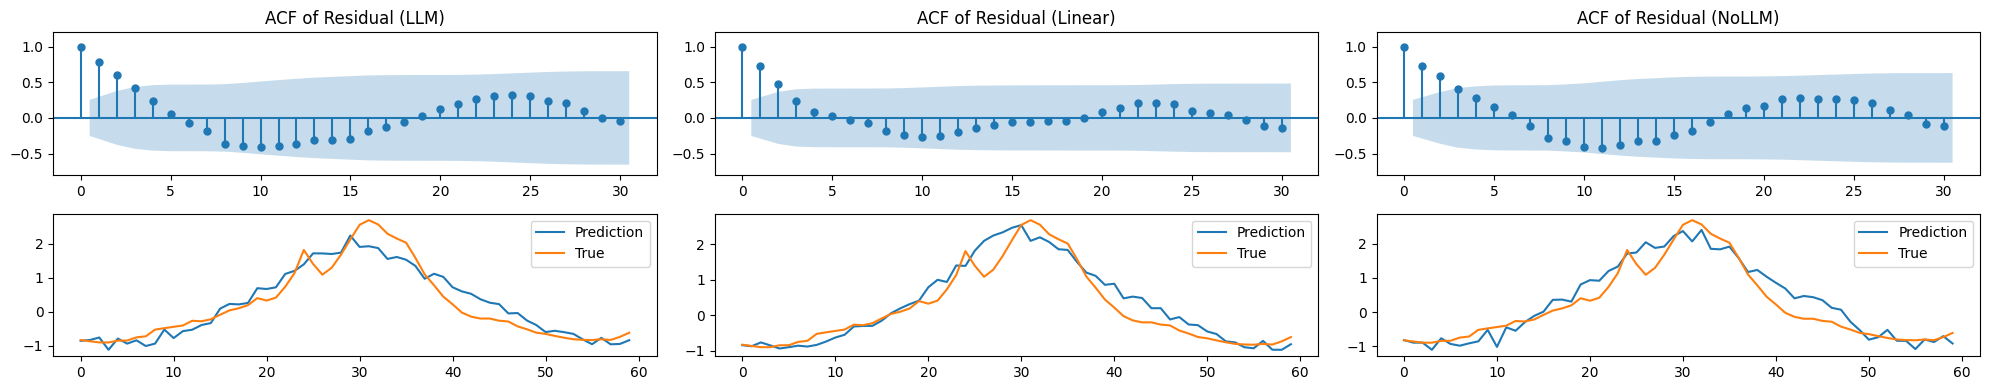

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def durbin_watson(residuals):
    residuals = residuals.flatten()
    diff_residuals = np.diff(residuals)
    numerator = np.sum(diff_residuals ** 2)
    denominator = np.sum(residuals ** 2)
    return numerator / denominator


# def durbin_watson(residuals):
#     residuals = residuals.flatten()
#     diff_residuals = np.diff(residuals)
#     numerator = np.sum(diff_residuals ** 2)
#     denominator = np.sum(residuals ** 2)
#     return numerator / denominator

idx = 50

gpt_pred_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/pred.npy'
gpt_true_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/true.npy'

gpt_pred_y = np.load(gpt_pred_file)
gpt_true_y = np.load(gpt_true_file)

gpt_res_y = gpt_true_y - gpt_pred_y
gpt_residuals = gpt_res_y[idx,:,0]

ln_pred_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Linear_0/pred.npy'
ln_true_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Linear_0/true.npy'
ln_pred_y = np.load(ln_pred_file)
ln_true_y = np.load(ln_true_file)
ln_res_y = ln_true_y - ln_pred_y
ln_residuals = ln_res_y[idx,:,0]

Nollm_pred_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_NoLLM_0/pred.npy'
Nollm_true_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_NoLLM_0/true.npy'
Nollm_pred_y = np.load(Nollm_pred_file)
Nollm_true_y = np.load(Nollm_true_file)
Nollm_res_y = Nollm_true_y - Nollm_pred_y
Nollm_residuals = Nollm_res_y[idx,:,0]
time = np.arange(len(Nollm_residuals))
fig, ax = plt.subplots(2, 3, figsize=(20, 4))


gpt_dw_stat = durbin_watson(gpt_residuals)
print(f'DW Statistics------> {gpt_dw_stat}')
print(gpt_residuals.shape)
# GPT residual Plot
plot_acf(gpt_residuals, lags=30, ax=ax[0,0], title="ACF of Residual (LLM)")
# plot_pacf(gpt_residuals, lags=30, ax=ax[1,0], title="PACF of Residual (LLM)")
ax[1, 0].plot(gpt_pred_y[idx, :, 0], label='Prediction')
ax[1, 0].plot(gpt_true_y[idx, :, 0], label='True')
ax[1, 0].legend()
ax[0, 0].set_ylim(-0.8, 1.2)
# ax[1, 0].set_ylim(-0.8, 1.2)


ln_dw_stat = durbin_watson(ln_residuals)
print(f'DW Statistics------> {ln_dw_stat}')
# Linear residual Plot
plot_acf(ln_residuals, lags=30, ax=ax[0, 1], title="ACF of Residual (Linear)")
# plot_pacf(ln_residuals, lags=30, ax=ax[1, 1], title="PACF of Residual (Linear)")
ax[1, 1].plot(ln_pred_y[idx, :, 0], label='Prediction')
ax[1, 1].plot(ln_true_y[idx, :, 0], label='True')
ax[1, 1].legend()
ax[0, 1].set_ylim(-0.8, 1.2)
# ax[1, 1].set_ylim(-0.8, 1.2)


trans_dw_stat = durbin_watson(Nollm_residuals)
print(f'DW Statistics------> {trans_dw_stat}')
# Trans Residual Plot
plot_acf(Nollm_residuals, lags=30, ax=ax[0, 2], title="ACF of Residual (NoLLM)")
# plot_pacf(Nollm_residuals, lags=30, ax=ax[1, 2], title="PACF of Residual (NoLLM)")
ax[1, 2].plot(Nollm_pred_y[idx, :, 0], label='Prediction')
ax[1, 2].plot(Nollm_true_y[idx, :, 0], label='True')
ax[1, 2].legend()
ax[0, 2].set_ylim(-0.8, 1.2)
# ax[1, 2].set_ylim(-0.8, 1.2)

plt.tight_layout()
plt.show()



In [9]:
## Calculate the 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def durbin_watson(residuals):
    residuals = residuals.flatten()
    diff_residuals = np.diff(residuals)
    numerator = np.sum(diff_residuals ** 2)
    denominator = np.sum(residuals ** 2)
    return numerator / denominator

gpt_pred_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/pred.npy'
gpt_true_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/true.npy'

gpt_pred_y = np.load(gpt_pred_file)
gpt_true_y = np.load(gpt_true_file)

gpt_res_y = gpt_true_y - gpt_pred_y
gpt_res_y = gpt_res_y.reshape((-1, 60))
# gpt_residuals = gpt_res_y[idx,:,0]

ln_pred_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Linear_0/pred.npy'
ln_true_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Linear_0/true.npy'
ln_pred_y = np.load(ln_pred_file)
ln_true_y = np.load(ln_true_file)
ln_res_y = ln_true_y - ln_pred_y
ln_res_y = ln_res_y.reshape((-1, 60))
# ln_residuals = ln_res_y[idx,:,0]

Nollm_pred_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_NoLLM_0/pred.npy'
Nollm_true_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_illness_CALF__104_60_100_CALF_custom_ftM_sl104_ll0_pl60_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_NoLLM_0/true.npy'
Nollm_pred_y = np.load(Nollm_pred_file)
Nollm_true_y = np.load(Nollm_true_file)
Nollm_res_y = Nollm_true_y - Nollm_pred_y
Nollm_res_y = Nollm_res_y.reshape((-1, 60))


## GPT2
score = []
for seq_x in gpt_res_y:
    score.append(durbin_watson(seq_x))
score = np.mean(score)
print(score)

score = []
for seq_x in ln_res_y:
    score.append(durbin_watson(seq_x))
score = np.mean(score)
print(score)

score = []
for seq_x in Nollm_res_y:
    score.append(durbin_watson(seq_x))
score = np.mean(score)
print(score)

0.8560298
0.8806558
0.88097394


DW Statistics------> 0.34264785051345825
(720,)
DW Statistics------> 0.2887030243873596
DW Statistics------> 0.3029305040836334


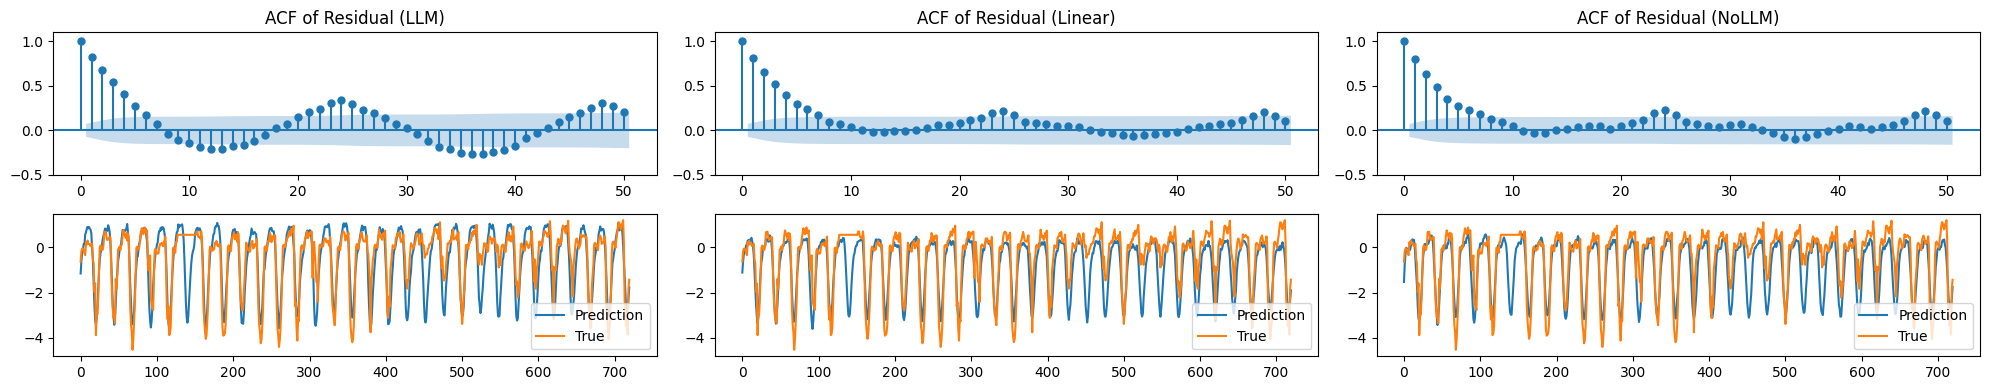

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def durbin_watson(residuals):
    residuals = residuals.flatten()
    diff_residuals = np.diff(residuals)
    numerator = np.sum(diff_residuals ** 2)
    denominator = np.sum(residuals ** 2)
    return numerator / denominator


# def durbin_watson(residuals):
#     residuals = residuals.flatten()
#     diff_residuals = np.diff(residuals)
#     numerator = np.sum(diff_residuals ** 2)
#     denominator = np.sum(residuals ** 2)
#     return numerator / denominator

idx = 40
gpt_pred_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/pred.npy'
gpt_true_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_GPT2_0/true.npy'

gpt_pred_y = np.load(gpt_pred_file)
gpt_true_y = np.load(gpt_true_file)

gpt_res_y = gpt_true_y - gpt_pred_y
gpt_residuals = gpt_res_y[idx,:,0]

ln_pred_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Linear_0/pred.npy'
ln_true_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_Linear_0/true.npy'
ln_pred_y = np.load(ln_pred_file)
ln_true_y = np.load(ln_true_file)
ln_res_y = ln_true_y - ln_pred_y
ln_residuals = ln_res_y[idx,:,0]

Nollm_pred_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_NoLLM_0/pred.npy'
Nollm_true_file = '/home/nathan/LLM4TS/Imputation_task/CALF/results/long_term_forecast_ETTh1_CALF_96_720_CALF_ETTh1_ftM_sl96_ll0_pl720_dm768_nh4_el2_dl1_df768_fc1_ebtimeF_dtTrue_test_gpt6_NoLLM_0/true.npy'
Nollm_pred_y = np.load(Nollm_pred_file)
Nollm_true_y = np.load(Nollm_true_file)
Nollm_res_y = Nollm_true_y - Nollm_pred_y
Nollm_residuals = Nollm_res_y[idx,:,0]
time = np.arange(len(Nollm_residuals))
fig, ax = plt.subplots(2, 3, figsize=(20, 4))




gpt_dw_stat = durbin_watson(gpt_residuals)
print(f'DW Statistics------> {gpt_dw_stat}')
print(gpt_residuals.shape)
# GPT residual Plot
plot_acf(gpt_residuals, lags=50, ax=ax[0,0], title="ACF of Residual (LLM)")
# plot_pacf(gpt_residuals, lags=50, ax=ax[1,0], title="PACF of Residual (LLM)")
ax[1, 0].plot(gpt_pred_y[idx, :, 0], label='Prediction')
ax[1, 0].plot(gpt_true_y[idx, :, 0], label='True')
ax[1, 0].legend()
ax[0, 0].set_ylim(-0.5, 1.1)
# ax[1, 0].set_ylim(-0.5, 1.1)




ln_dw_stat = durbin_watson(ln_residuals)
print(f'DW Statistics------> {ln_dw_stat}')
# Linear residual Plot
plot_acf(ln_residuals, lags=50, ax=ax[0, 1], title="ACF of Residual (Linear)")
# plot_pacf(ln_residuals, lags=50, ax=ax[1, 1], title="PACF of Residual (Linear)")
ax[1, 1].plot(ln_pred_y[idx, :, 0], label='Prediction')
ax[1, 1].plot(ln_true_y[idx, :, 0], label='True')
ax[1, 1].legend()
ax[0, 1].set_ylim(-0.5, 1.1)
# ax[1, 1].set_ylim(-0.5, 1.1)




trans_dw_stat = durbin_watson(Nollm_residuals)
print(f'DW Statistics------> {trans_dw_stat}')
# Trans Residual Plot
plot_acf(Nollm_residuals, lags=50, ax=ax[0, 2], title="ACF of Residual (NoLLM)")
# plot_pacf(Nollm_residuals, lags=50, ax=ax[1, 2], title="PACF of Residual (NoLLM)")
ax[1, 2].plot(Nollm_pred_y[idx, :, 0], label='Prediction')
ax[1, 2].plot(Nollm_true_y[idx, :, 0], label='True')
ax[1, 2].legend()
ax[0, 2].set_ylim(-0.5, 1.1)
# ax[1, 2].set_ylim(-0.5, 1.1)

plt.tight_layout()
plt.show()

